### OpenCV
- 컴퓨터 비전, 머신러닝관련하여 다양항 알고리즘을 제공
- OpenCV 데이터가 내부적으로 Numpy 배열로 변환되어 내부 처리를 수행
- Numpy, Matplotlib 과 호환됨
- 공식 사이트 : https://opencv.org/

### 이미지 읽고 출력하기!

In [5]:
import cv2
img = cv2.imread('data/MinT.jpg', cv2.IMREAD_COLOR)

cv2.imshow('MinT', img)
cv2.waitKey(0)




-1

### Matplotlib 을 활용하여 이미지를 출력하기

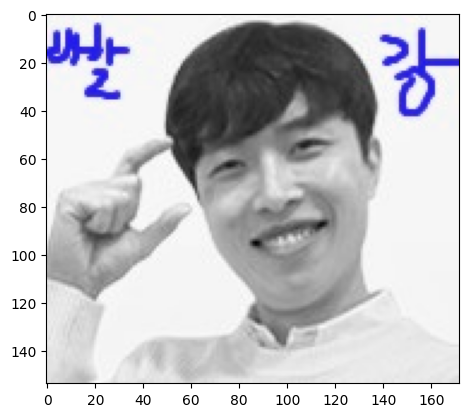

In [6]:
import matplotlib.pyplot as plt

img = cv2.imread('data/MinT.jpg', cv2.IMREAD_COLOR)

plt.imshow(img)

### 색상공간
- openCV에서는 색상공간을 BGR (blue, Green, red)을 사용
- python 이미지들은 RGB(red, green, blue)을 사용하므로 변환 필요
- openCV로 읽은 이미지를 Matplotlib 으로 출력해주기 위해서는 색상공간변환이 필요하다!
- cv2.cvtColor() 사용

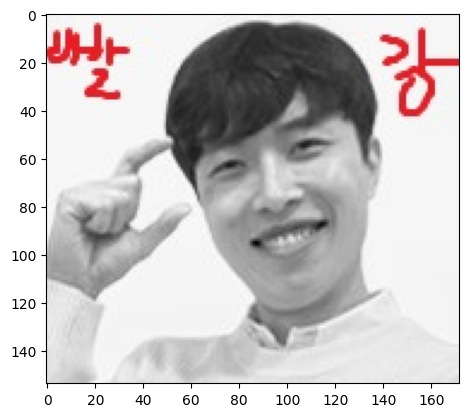

In [8]:
img = cv2.imread('data/MinT.jpg', cv2.IMREAD_COLOR)
# 색상공간을 변환 (BGR -> RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR2RGB : BGR -> RGB

plt.imshow(img)

### 이진 이미지(Binary) , 흑백 이미지(Gray)
- 컬러이미지 : RGB로 구성된 이미지
- 컬러이미지를 분석데이터로 사용할때 문제발생!
    - 시각은 색상 정보에 따라서 잘못된 정보를 보내주는 경우가 있음
    - 밤또는 오히려 빛을 강하게 주는 경우 정확한 색상을 보여주지 못하는 경우가 있다
- 컬러데이터는 3개의 채널을 가지고 있음 > 연산량이 많아지게됨 > 속도가 느리다
    - 실시간 처리가 어려워짐
- 컬러데이터를 gray, binart를 변환해서 처리해주는것을 더 선호한다

- gray 흑백이미지 : 0~255 사이의 값을 가지는 흑백이미지
- binary 이진이미지 : 0(검정)과 255(흰) 값으로만 구성된 이진 이미지
    - 필터링, 얼굴, 특정부위만 따낼때 많이 사용된다~, 필요한 부분만 가져올때 사용

### 컬러이미지 -> 흑백 이미지
- 2 가지 방법 활용
    1. imread() 이미지를 읽을 때부터 반환
       - 최종까지 컬러데이터를 사용할 필요가 없을때
    3. 컬러로 이미지를 읽어서 cvt 활용하여 반환
       - 분석은 흑백으로 하되 최종출력은 컬러 이미지가 필요할때

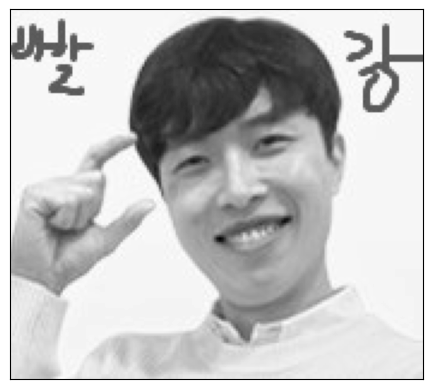

In [13]:
# imread() 이미지를 읽어올때부터 흑백이미지로 변환해서 불러오기
# 흑백이미지 불러오기
img = cv2.imread('data/MInT.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray') # 컬러차트 gray 변경
plt.xticks([])
plt.yticks([])
plt.show()

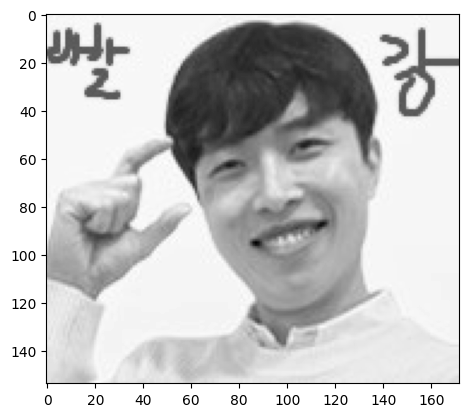

In [14]:
# 컬러이미지로 읽어와서 gray 이미지로 변경하는 방법
img = cv2.imread('data/MinT.jpg', cv2.IMREAD_COLOR)
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg, cmap = 'gray')

### 이진이미지 만들기
- 이진이미지는 픽셀값이 0 과 255로만 이루어진 흑/백 으로 표현한 이미지
- 배경과 객체의 구분, 관심or비관심 영역을 나눌때 주로 사용된다
- 문턱값(임계치) 을 기준으로 작으면 0(검정) , 크면 255(흰) 변경

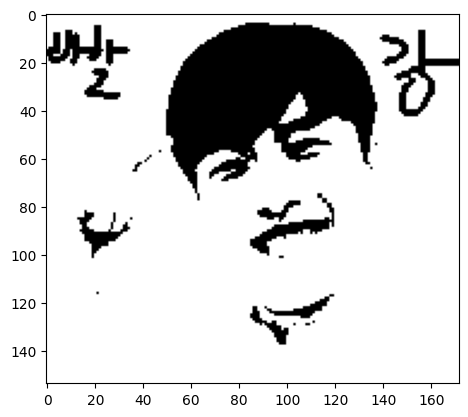

In [22]:
# 이진 이미지로 변경을 위해 흑백이미지 불러오기
img = cv2.imread('data/MinT.jpg', cv2.IMREAD_GRAYSCALE)

# cv2.threshold(img, 임계치(문턱값/기준), 보내줄값, 방법)
_,binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
# threshhold 함수는 2개의 값을 반환
# 첫번째 반환값 : 임계치 (_) -> 그냥 잘 사용안하는 변수명으로 지정해서 없애버리는 느낌
# 두번째 반환값 : 변환한 이미지 (binary_img)

plt.imshow(binary_img, cmap = 'gray')

- flag : 문턱값 적용 방법 (다양한 형태의 이진화 방법) 실제로는 위의 두값을 사용
  - cv2.THRESH_BINARY : 픽셀값이 문턱값보다 크면 value, 아니면 0을 할당
  - cv2.THRESH_BINARY_INV : 픽셀값이 문턱값보다 크면 0, 아니면 value를 할당 (inverse)
  - cv2.THRESH_TRUNC : 픽셀값이 문턱값보다 크면 문턱값, 아니면 픽셀값을 그대로 할당
  - cv2.THRESH_TOZERO : 픽셀값이 문턱값보다 크면 픽셀값, 아니면 0을 할당
  - cv2.THRESH_TOZERO_INV : 픽셀값이 문턱값보다 크면 0, 아니면 픽셀값을 할당

(([], []), ([], []))

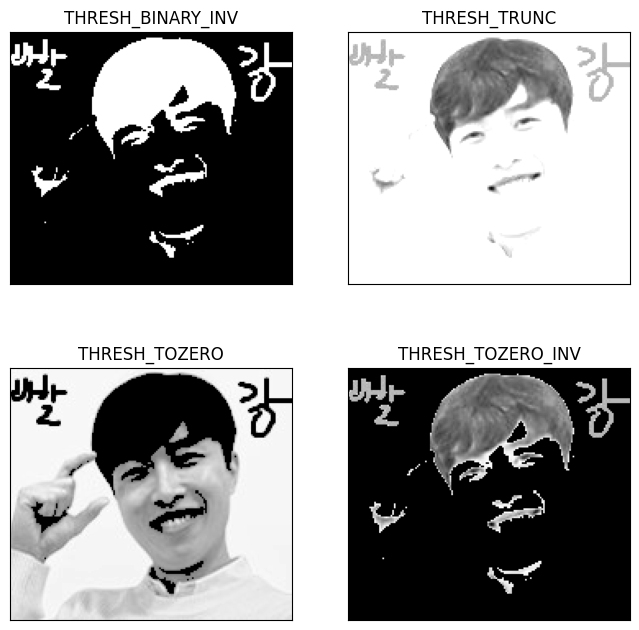

In [23]:
# flag 값에 따른 출력 비교
plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)   


# 우리가 필요한건 글씨이기때문에 글씨를 검정색으로 출력해주기위함!
_, thr1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thr1, cmap='gray')
plt.title('THRESH_BINARY_INV')
plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2)   

_, thr1 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
plt.imshow(thr1, cmap='gray')
plt.title('THRESH_TRUNC')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3)   
_, thr1 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
plt.imshow(thr1, cmap='gray')
plt.title('THRESH_TOZERO')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4)   
_, thr1 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(thr1, cmap='gray')
plt.title('THRESH_TOZERO_INV')
plt.xticks([]), plt.yticks([])